## LINEAR REGRESSION 
** LEARNING FROM THE SCRATCH**


### IMPORT LIBRARIES

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
seed=42
np.random.seed(seed)

### DEFINE REQUIRED FUNCTIONS

In [2]:
#1. Generate dataset
def generate_linear_dataset(n, dim, noise_bound = 0.5, is_reg = True):    
    '''
    Generate the linear dataset with uniform random noise within noise_bound
    n: number of samples, dim: number of dimension, is_reg: linear or logistics
    '''
    W = np.random.randn(dim+1, 1) # shape (dim+1)x1 including bias W0
    X0 = np.ones((n, 1)) # shape nx1
    X = np.random.randn(n, dim) # shape nxdim
    X = np.concatenate((X0, X), axis = 1) # shape nx(dim+1)

    # Generate data with uniform random noise from -0.5 to 0.5
    y = np.dot(X, W) + np.random.rand(n, 1)*noise_bound*2 - noise_bound
    # Reduce the demension nx1 to n 
    y = np.squeeze(y)

    return X, y, W

# 2. Generate the train and validation set
def get_train_val(X, y, val_ratio = 0.2, shuffle = False):
    n = X.shape[0]
    if shuffle: 
        idx = np.random.permutation(n)
        X, y = X[idx], y[idx]
    val_size = int(n*val_ratio)
    return X[:n-val_size, :], y[:n-val_size], X[-val_size:, :], y[-val_size:]

# 3. Mean squared Error Function
def MSE(y, y_pred):
    '''
    Mean squared error
    '''
    return np.mean((y_pred -y)**2)

# 4. Derivative of MSE loss Function
def MSE_grad(y, y_pred):
    '''
        Derivative of MSE los w.r.t y_pred (not w)
    '''
    return (2/len(y))*(y_pred - y)

# 5. Plot learnig Curve
def plot_learning_curve(train_losses,val_losses):    
    plt.plot(range(len(train_losses)),train_losses,'o-',color='r',label='Training loss',markersize=1)
    plt.plot(range(len(train_losses)),val_losses,'o-',color='g',label='Validation loss',markersize=1)
    plt.legend(loc="best")
    plt.show()

### LINEAR REGRESSION 

In [3]:
def initialize_weight(dim):
    W0 = np.array([[0]]) # bias W0 shape 1x1
    W = np.random.randn(dim, 1) # shape dimx1
    return np.concatenate((W0, W))

def Linear_Regression(X, y, lr, l2, n_iteration, val_ratio):
    '''
    Fit data using gradient descent and L2 regulization
    '''    
    W = initialize_weight(dim)
    train_losses = []
    val_losses = []
    X_train, y_train, X_val, y_val = get_train_val(X, y, val_ratio)

    for i in range(n_iteration):
    #TRAINING STEP
        y_pred = np.squeeze(np.dot(X_train, W))
        # GRADIENDESCENT 
        # STEP 1: Calculate MSE loss for regression
        loss = MSE(y_train, y_pred)
        # STEP 1: Calculate gradient of Loss
        grad = MSE_grad(y_train, y_pred)  # shape (n,)

        # STEP 3: Calculate the gradient of bias 
        grad_w = np.dot(X_train.T, grad) # shape (dim,)
        if len(grad_w.shape) ==1:
            grad_w = grad_w[:, None] # turn to (dim,)
        
        # STEP 4: Calculate the gradient of bias with L2 regulization
        # Ignore update of grad_w0 since w0 does not contribule to regulization process
        grad_w[1:, :] += 2*(l2/len(X_train))*W[1:, :] # using formular : (2*lambda/m)*weight
        # STEP 5: Update Weight
        W -= lr*grad_w

        # Save training loss (for evaluation)
        train_losses.append(loss)

    # VALIDATION STEP 
        y_pred = np.squeeze(np.dot(X_val, W))
        val_loss = MSE(y_val, y_pred)
        # Save validation loss (for evaluation)
        val_losses.append(val_loss)

        # Print out some results 
        if (i+1) % 20 == 0:
            print('{}. Training loss: {}. Validation loss: {}'.format(i+1, loss, val_loss))
        
    plot_learning_curve(train_losses,val_losses)


## LINEAR REGRESSION WITH 1 DIMESION
### SET PARAMETERS

In [4]:
lr = 0.01                # learning rate
l2 = 0                   # L2 regulization 
n_iteration = 200        # Number of iteration
val_ratio = 0.2          # Valization ratio
dim = 1                  # 1 dimension
size = 500              # Number of samples
loss_fn = MSE            # 
grad_fn = MSE_grad

### GENERATE THE DATASET

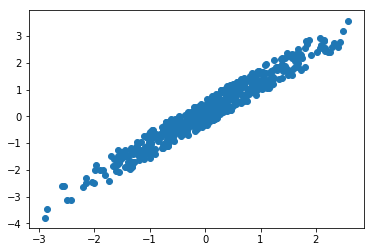

In [7]:
X,y,W = generate_linear_dataset(size, dim)
plt.scatter(X[:,1],y)

### FIT THE DATASET 

20. Training loss: 0.5539492494860506. Validation loss: 0.4353456264966285
40. Training loss: 0.2847002635953222. Validation loss: 0.2243375231002095
60. Training loss: 0.16919934055938549. Validation loss: 0.13749959766985384
80. Training loss: 0.11946517827310968. Validation loss: 0.10257128492930151
100. Training loss: 0.09796454572465135. Validation loss: 0.08910051784101984
120. Training loss: 0.08863083601231735. Validation loss: 0.084320545198117
140. Training loss: 0.08456142512945611. Validation loss: 0.0829321913617466
160. Training loss: 0.0827793072752901. Validation loss: 0.08277543795194718
180. Training loss: 0.08199532473407842. Validation loss: 0.08299831267941843
200. Training loss: 0.08164885792390247. Validation loss: 0.08328516811851334


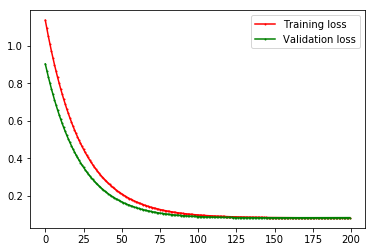

In [10]:
Linear_Regression(X, y, lr, l2, n_iteration, val_ratio)